In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt



In [34]:
df =pd.read_csv(r'data/forestfires.csv')
df =df.drop(columns=["rain"])

In [35]:
months =["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]
weekdays=["mon","tue","wed","thu","fri","sat","sun"]
for i in range(len(df["month"])):
    for j in range(len(months)):
        if df.iloc[i]["month"] ==months[j]:
            df.at[i,"month"]=j
            break
for i in range(len(df["day"])):
    for j in range(len(weekdays)):
        if df.iloc[i]["day"] ==weekdays[j]:
            df.at[i,"day"]=j
            break
fire_occured =[]
for i in range(len(df)):
    if df.iloc[i].area >0:
        fire_occured.append(1)
    else:
        fire_occured.append(0)
df["fire_occured"] =fire_occured  


In [36]:

area=np.array(df.area)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, SelectFromModel

In [38]:
vars =df.drop(columns=["area","fire_occured"])
scaler =StandardScaler().fit(vars)
scaled_vars=scaler.transform(vars)


## Trying out different feature selection methods

In [39]:
#lasso model 
lr_selector =SelectFromModel(linear_model.LogisticRegression(),max_features=4)
lr_selector.fit(vars,df.fire_occured)
lr_support=lr_selector.get_support()
lr_feature = vars.loc[:,lr_support].columns.tolist()
print(str(lr_feature), 'selected features')

['X', 'Y', 'month', 'wind'] selected features


/home/arnav/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
#regression feature elimination 
rfe_estimator =RFE(estimator=linear_model.LogisticRegression(),n_features_to_select=5,step=10,verbose=5)
rfe_estimator.fit(vars,df.fire_occured)
rfe_support=rfe_estimator.get_support()
rfe_feature = vars.loc[:,rfe_support].columns.tolist()
print(str(rfe_feature), 'selected features')



Fitting estimator with 11 features.
['X', 'Y', 'month', 'day', 'wind'] selected features


/home/arnav/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
size =98
state =45
train_vars,test_vars,train_results,test_results =train_test_split(vars.get(rfe_feature),np.array(df.fire_occured),test_size=1-size/100,random_state=state) 

In [42]:
reg_line =linear_model.LinearRegression()
reg_line.fit(train_vars,train_results)
print(f'Coeffecients of the linear model{reg_line.coef_}')

predictions =reg_line.predict(test_vars)

Coeffecients of the linear model[ 0.01110259  0.01461167  0.03171861 -0.0091926   0.02278039]


In [43]:
#predictions = np.exp(predictions)-1
tft=[y for y in test_results]
for i in range(len(predictions)):
    if predictions[i] > .5:
        predictions[i]=1
    else: predictions[i]=0
#tft=np.exp(np.array(tft))-1


In [44]:
print(f'MSE: {mean_squared_error(tft,predictions)}')
print(f'R2: {r2_score(tft,predictions)}')
print(f'MAE: {mean_absolute_error(tft,predictions)}')
print(f'AccuracyScore{accuracy_score(tft,predictions)}')


MSE: 0.5454545454545454
R2: -1.3571428571428572
MAE: 0.5454545454545454
AccuracyScore0.45454545454545453


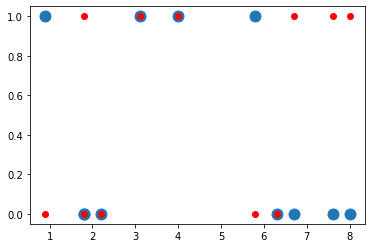

In [45]:
column="wind"
plt.clf()
plt.scatter(test_vars[column],test_results,s=120)
plt.scatter(test_vars[column], predictions, c="red")
plt.show()

In [46]:
import seaborn as sn
import  matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [47]:
#change purpose to make this aclassifier model that is now trying to predict wether there is a fire
#sn.pairplot(df,height=1)
#gives graphes for every feature


In [48]:
log_model = LogisticRegression(C =1,random_state =state,max_iter=250)
log_model.fit(train_vars,train_results)
log_predictions=log_model.predict(test_vars)
print(f'Coeffecients of the log model{log_model.coef_}')


Coeffecients of the log model[[ 0.04550043  0.06107352  0.13227932 -0.03868584  0.09655225]]


In [49]:
print(f'MSE: {mean_squared_error(tft,log_predictions)}')
print(f'R2: {r2_score(tft,log_predictions)}')
print(f'MAE: {mean_absolute_error(tft,log_predictions)}')
print(f'AccuracyScore{accuracy_score(tft,log_predictions)}')

MSE: 0.5454545454545454
R2: -1.3571428571428572
MAE: 0.5454545454545454
AccuracyScore0.45454545454545453


Feature:X


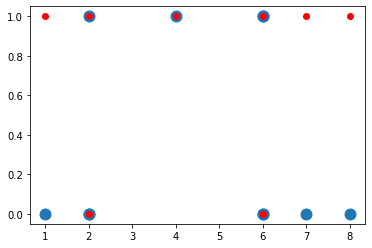

Feature:Y


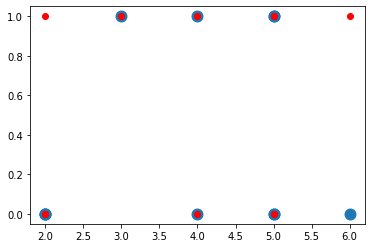

Feature:month


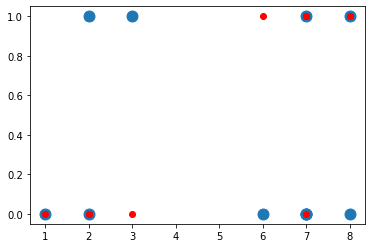

Feature:day


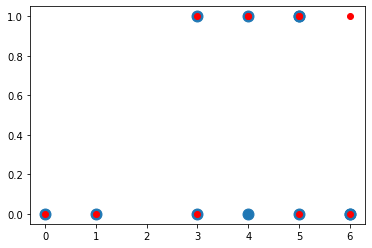

Feature:wind


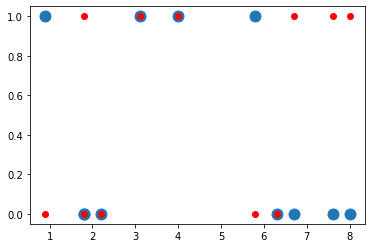

In [50]:
for feature in (test_vars.columns):
    print(f'Feature:{feature}')
    plt.clf()
    plt.scatter(test_vars[feature],test_results,s=120)
    plt.scatter(test_vars[feature], log_predictions, c="red")
    plt.show()

In [51]:
from sklearn import svm

In [52]:
clf =svm.SVC(random_state=state)
clf.fit(train_vars,train_results)
svm_predictions=clf.predict(test_vars)

In [53]:
print(f'MSE: {mean_squared_error(tft,svm_predictions)}')
print(f'R2: {r2_score(tft,svm_predictions)}')
print(f'MAE: {mean_absolute_error(tft,svm_predictions)}')
print(f'AccuracyScore{accuracy_score(tft,svm_predictions)}')

MSE: 0.6363636363636364
R2: -1.75
MAE: 0.6363636363636364
AccuracyScore0.36363636363636365


Feature:X


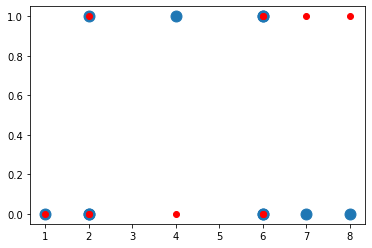

Feature:Y


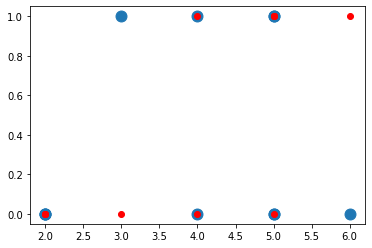

Feature:month


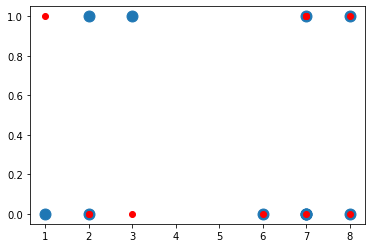

Feature:day


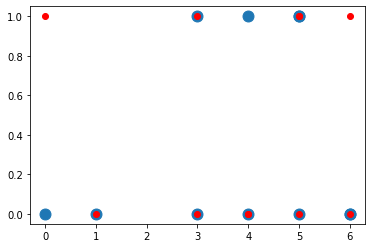

Feature:wind


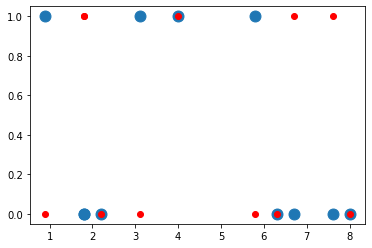

In [54]:
for feature in test_vars.columns:
    print(f'Feature:{feature}')
    plt.clf()
    plt.scatter(test_vars[feature],test_results,s=120)
    plt.scatter(test_vars[feature], svm_predictions, c="red")
    plt.show()